# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sabha
Processing Record 2 of Set 1 | verdal
Processing Record 3 of Set 1 | nong phai
Processing Record 4 of Set 1 | holualoa
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | kapuskasing
Processing Record 9 of Set 1 | tamiahua
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | palapag
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | timaru
Processing Record 21 of Set 1 | mount pearl
Processing Record 22 of Set 1 | saint-philippe
Processing Record 

Processing Record 38 of Set 4 | farsala
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | badger
Processing Record 41 of Set 4 | mumford
Processing Record 42 of Set 4 | kurchatov
Processing Record 43 of Set 4 | luau
Processing Record 44 of Set 4 | solnechnyy
Processing Record 45 of Set 4 | wenling
Processing Record 46 of Set 4 | pestovo
Processing Record 47 of Set 4 | lakatoro
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | pacific grove
Processing Record 0 of Set 5 | sonsorol village
City not found. Skipping...
Processing Record 1 of Set 5 | mount gambier
Processing Record 2 of Set 5 | maragogi
Processing Record 3 of Set 5 | kristiansund
Processing Record 4 of Set 5 | luorong
Processing Record 5 of Set 5 | micheweni
Processing Record 6 of Set 5 | xam nua
Processing Record 7 of Set 5 | st. john's
Processing Record 8 of Set 5 | murghob
Processing Record 9 of Set 5 | bandar abbas
Processing Record 10 of Set 5 | mukah
City not found. S

Processing Record 28 of Set 8 | mahibadhoo
Processing Record 29 of Set 8 | le creusot
Processing Record 30 of Set 8 | san luis de la loma
Processing Record 31 of Set 8 | belawan
Processing Record 32 of Set 8 | cape canaveral
Processing Record 33 of Set 8 | guatrache
Processing Record 34 of Set 8 | guadalupe y calvo
Processing Record 35 of Set 8 | cloverdale
Processing Record 36 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 37 of Set 8 | dinskaya
Processing Record 38 of Set 8 | val-d'or
Processing Record 39 of Set 8 | hihifo
City not found. Skipping...
Processing Record 40 of Set 8 | oum hadjer
Processing Record 41 of Set 8 | la londe-les-maures
Processing Record 42 of Set 8 | shadrinsk
Processing Record 43 of Set 8 | nadi
Processing Record 44 of Set 8 | pangkalanbuun
Processing Record 45 of Set 8 | koungou
Processing Record 46 of Set 8 | frontera corozal
City not found. Skipping...
Processing Record 47 of Set 8 | pangai
Processing Record 48 of Set 8 | morehead cit

Processing Record 16 of Set 12 | oriximina
Processing Record 17 of Set 12 | kulunda
Processing Record 18 of Set 12 | narvik
Processing Record 19 of Set 12 | samalut
Processing Record 20 of Set 12 | axim
Processing Record 21 of Set 12 | porto novo
Processing Record 22 of Set 12 | irymple
Processing Record 23 of Set 12 | tamanrasset
Processing Record 24 of Set 12 | kawthoung
City not found. Skipping...
Processing Record 25 of Set 12 | bubaque
Processing Record 26 of Set 12 | kirtipur
Processing Record 27 of Set 12 | nago
Processing Record 28 of Set 12 | banka
Processing Record 29 of Set 12 | dhidhdhoo
Processing Record 30 of Set 12 | kapa'a
Processing Record 31 of Set 12 | amungan
Processing Record 32 of Set 12 | guerrero negro
Processing Record 33 of Set 12 | noosa heads
Processing Record 34 of Set 12 | yantarnyy
Processing Record 35 of Set 12 | zuwarah
Processing Record 36 of Set 12 | taroa
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sabha,27.0377,14.4283,23.40,24,5,3.12,LY,1698703216
1,verdal,63.7933,11.4817,-6.98,74,5,2.43,NO,1698703218
2,nong phai,15.9903,101.0618,22.66,93,99,1.22,TH,1698703220
3,holualoa,19.6228,-155.9522,28.64,69,20,3.60,US,1698702851
4,grytviken,-54.2811,-36.5092,4.36,83,6,2.91,GS,1698702819


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sabha,27.0377,14.4283,23.40,24,5,3.12,LY,1698703216
1,verdal,63.7933,11.4817,-6.98,74,5,2.43,NO,1698703218
2,nong phai,15.9903,101.0618,22.66,93,99,1.22,TH,1698703220
3,holualoa,19.6228,-155.9522,28.64,69,20,3.60,US,1698702851
4,grytviken,-54.2811,-36.5092,4.36,83,6,2.91,GS,1698702819


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

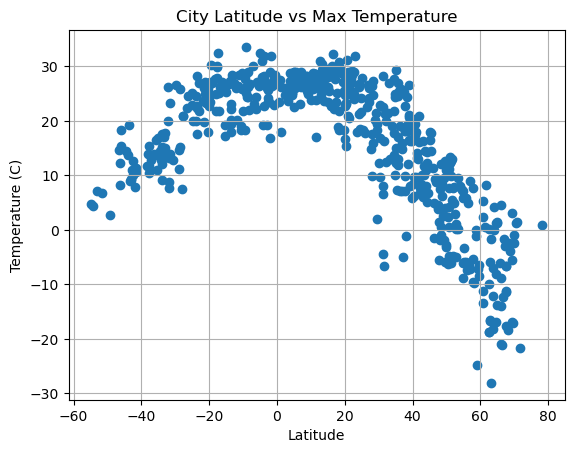

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

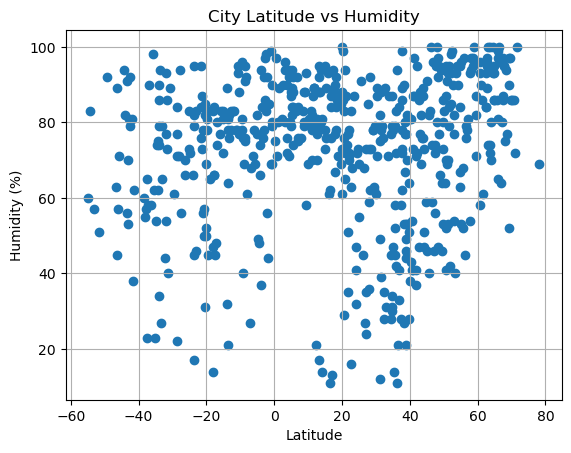

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

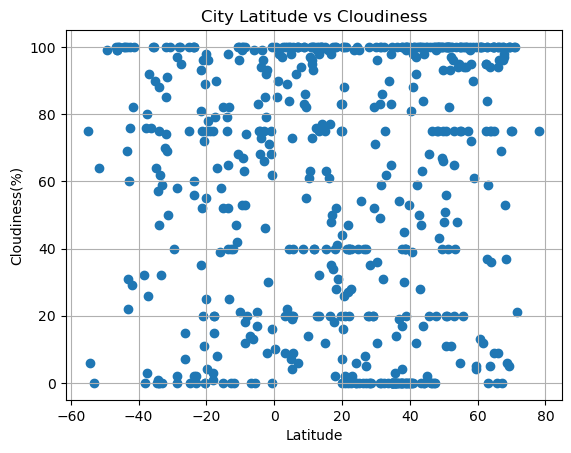

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

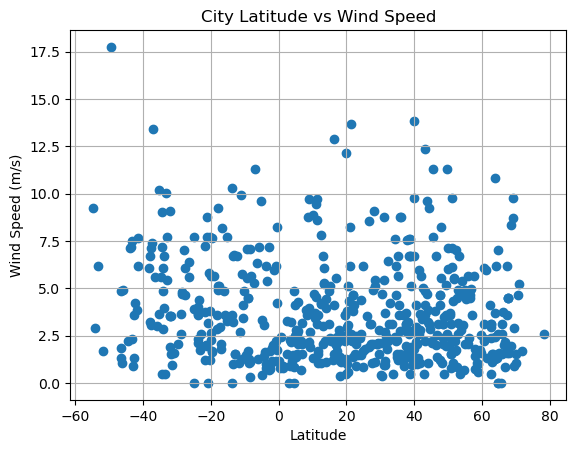

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values, annotation_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annotation_coord,fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0 ),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sabha,27.0377,14.4283,23.40,24,5,3.12,LY,1698703216
1,verdal,63.7933,11.4817,-6.98,74,5,2.43,NO,1698703218
2,nong phai,15.9903,101.0618,22.66,93,99,1.22,TH,1698703220
3,holualoa,19.6228,-155.9522,28.64,69,20,3.60,US,1698702851
5,anadyr,64.7500,177.4833,1.28,93,75,7.00,RU,1698702824


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0 ),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,grytviken,-54.2811,-36.5092,4.36,83,6,2.91,GS,1698702819
11,lebu,-37.6167,-73.6500,10.38,65,80,7.11,CL,1698702827
15,avarua,-21.2078,-159.7750,25.03,73,75,8.75,CK,1698702729
18,edinburgh of the seven seas,-37.0676,-12.3116,12.81,90,92,13.40,SH,1698702723
19,timaru,-44.4000,171.2500,14.48,94,100,2.24,NZ,1698703234


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7362311807037997


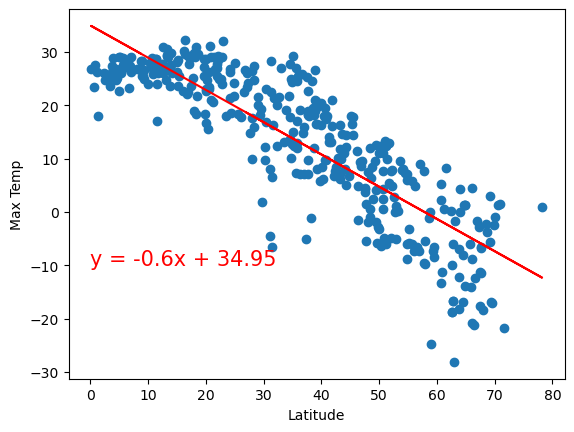

None


In [26]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
annotation_coord = (0, -10)
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values,annotation_coord))

The r-value is: 0.6218124644423462


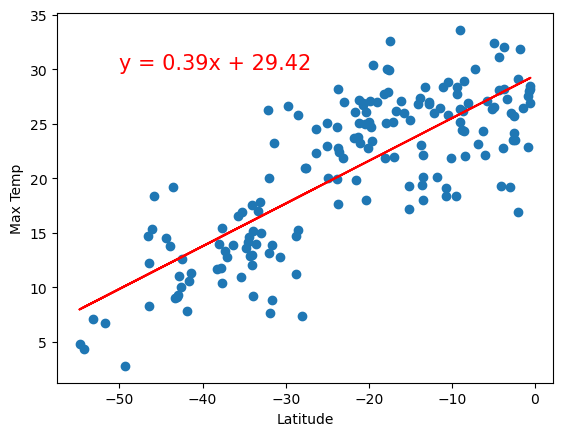

None


In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
annotation_coord = (-50, 30)
plt.ylabel("Max Temp")
print(linear_reg_plot(x_values,y_values, annotation_coord))

*There is a clear strong relationship between latitude and maximum temperature, there is a negative correlation in the Northern Hempisphere and postivie correlation in the Southern Hemisphere. This makes sense temperatures increase when advancing toward the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0073235923536062505


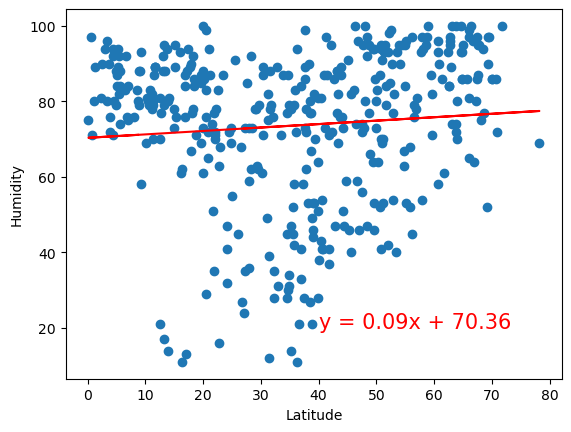

None


In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
annotation_coord = (40, 20)
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values, annotation_coord))

The r-value is: 0.025523215553941752


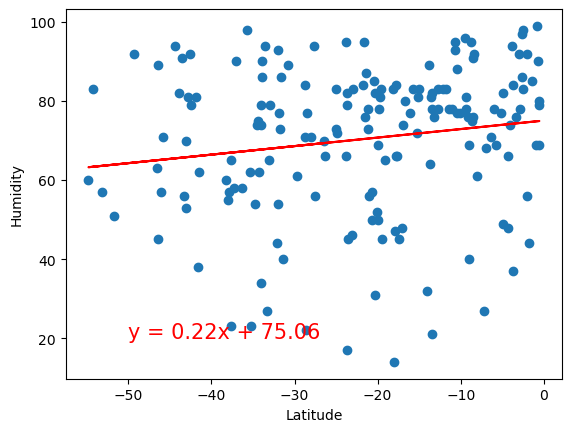

None


In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
annotation_coord = (-50, 20)
plt.ylabel("Humidity")
print(linear_reg_plot(x_values,y_values, annotation_coord))

*There is not a clear correlation between latitude and humidity as data points show a large spread.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011858120411064378


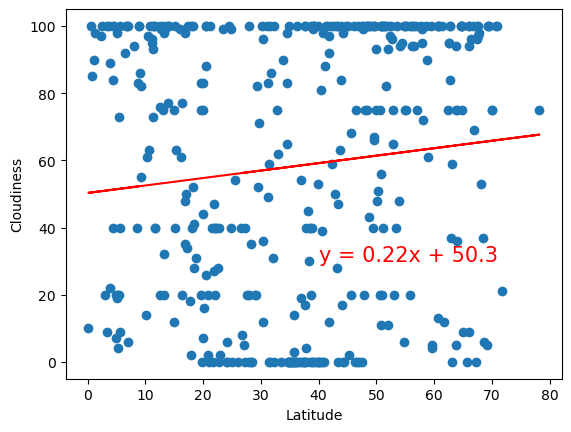

None


In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
annotation_coord = (40, 30)
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values, annotation_coord))

The r-value is: 0.004779830394695429


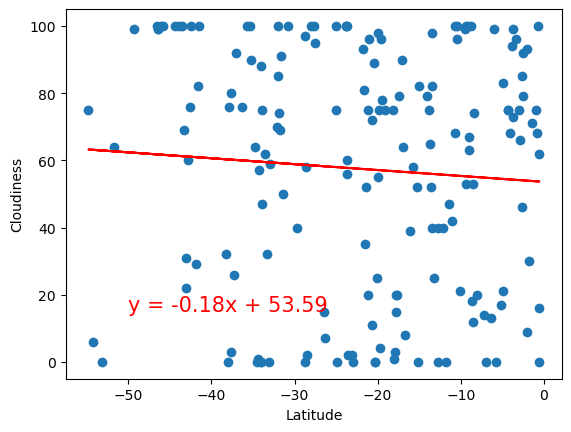

None


In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
annotation_coord = (-50, 15)
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values, annotation_coord))

*There is not a clear correlation between latitude and cloudiness as data points show a large spread.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.001616311161123331


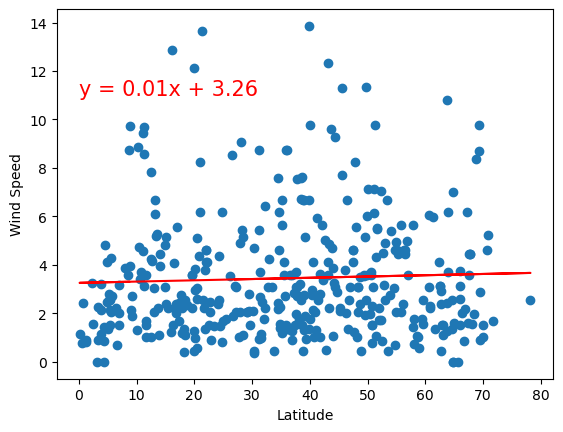

None


In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
annotation_coord = (0, 11)
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values, annotation_coord))

The r-value is: 0.03823822545205851


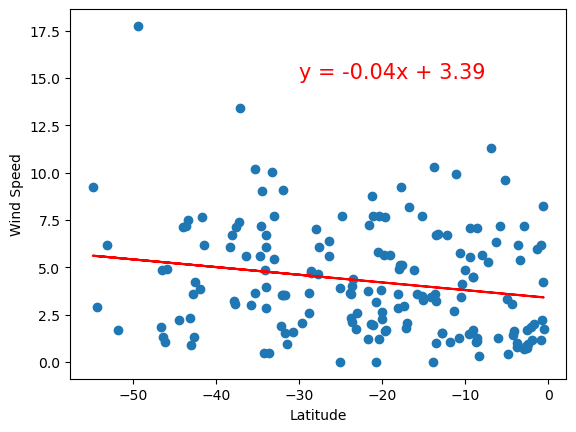

None


In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
annotation_coord = (-30, 15)
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values, annotation_coord))

*There is not a clear correlation between latitude and cloudiness as data points show a large spread.